<a href="https://colab.research.google.com/github/msimuko/code-unza25-csc4792-project_team_30/blob/main/code_unza25_csc4792_project_team_30_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reference Classification Project

## Overview
This project develops an automated system to classify academic references by publication type using machine learning techniques. The system can distinguish between journals, books, theses, conference papers, and other publication formats, helping researchers and librarians organize academic literature more efficiently.

## Objective
To build and evaluate a text classification model that accurately categorizes bibliographic references into different publication types based on their textual content and formatting patterns.

## Publication Types
The model classifies references into the following categories:
- **Journal Articles**: Peer-reviewed academic papers
- **Books**: Monographs and edited volumes
- **Thesis/Dissertations**: Graduate research works
- **Conference Papers**: Proceedings and presentations
- **Technical Reports / Reports**: Government and institutional publications
- **Web Resources**: Online publications and documents

> **Note:** The project and app support both "Report" and "Technical Report" as valid types.

## Tools and Technologies
- **Python 3.8+**: Primary programming language
- **Pandas**: Data manipulation and analysis
- **Scikit-learn**: Machine learning framework
- **TF-IDF Vectorizer**: Text feature extraction
- **Multinomial Naive Bayes**: Classification algorithm
- **Jupyter Notebook**: Development and experimentation environment
- **NumPy**: Numerical computations
- **Matplotlib/Seaborn**: Data visualization (optional)

## Project Structure
```
project-root/
├── data/
│   └── references.csv                  # Labeled training data
├── notebooks/
│   └── classification_model.ipynb     # Main ML pipeline
├── src/
│   └── utils.py                       # Text preprocessing functions
├── report/
│   └── draft.pdf                      # Technical documentation
├── slides/
│   └── presentation.pptx              # Project presentation
└── README.md                          # This file
```

## Data Format
The `references.csv` file should contain two columns:
- `reference_text`: Full bibliographic reference as text
- `publication_type`: Category label (journal, book, thesis, etc.)

Example:
```csv
reference_text,publication_type
"Smith, J. (2023). Machine Learning in Academia. Journal of AI Research, 15(3), 45-67.",journal
"Johnson, A. (2022). Deep Learning Fundamentals. MIT Press, Cambridge.",book
```

## Installation and Setup
1. **Clone or download** the project files
2. **Install required packages**:
   ```bash
   pip install pandas scikit-learn jupyter numpy
   ```
3. **Prepare your data**: Place labeled references in `data/references.csv`
4. **Launch Jupyter**:
   ```bash
   jupyter notebook notebooks/classification_model.ipynb
   ```

## Usage Instructions
1. **Data Preparation**: Ensure your reference data is properly formatted in CSV
2. **Text Cleaning**: The `utils.py` module handles preprocessing automatically
3. **Model Training**: Execute all cells in the Jupyter notebook sequentially
4. **Evaluation**: Review the classification report and confusion matrix
5. **Prediction**: Use the trained model to classify new references

## Model Performance
The system uses TF-IDF (Term Frequency-Inverse Document Frequency) for feature extraction combined with Multinomial Naive Bayes for classification. Expected performance metrics:
- **Accuracy**: 85-92% (depending on data quality)
- **Precision**: High for well-represented classes
- **Recall**: Varies by publication type complexity
- **F1-Score**: Balanced performance across categories

## Key Features
- **Robust Text Preprocessing**: Handles various reference formats
- **Feature Engineering**: TF-IDF with n-grams (1-2) for better context
- **Scalable Pipeline**: Easy to retrain with new data
- **Performance Analysis**: Comprehensive evaluation metrics
- **Extensible Design**: Simple to add new publication types

## Team Information
**Course**: CSC 4792 - Machine Learning Applications  
**Institution**: University of Zambia (UNZA)  
**Team Size**: 5 Students  
**Academic Year**: 2024/2025  

## Development Workflow
1. **Data Collection**: Gather and label reference examples
2. **Preprocessing**: Clean and standardize text format
3. **Feature Extraction**: Convert text to numerical features
4. **Model Training**: Train classification algorithm
5. **Evaluation**: Assess performance on test data
6. **Optimization**: Fine-tune parameters and features
7. **Documentation**: Report findings and methodology

## Future Enhancements
- **Deep Learning Models**: Experiment with neural networks (LSTM, BERT)
- **Active Learning**: Iteratively improve with user feedback
- **Web Interface**: Deploy as a web application
- **Multi-language Support**: Handle references in multiple languages
- **Citation Parsing**: Extract structured metadata from references

## File Descriptions

### `src/utils.py`
Contains the `clean_reference()` function for text preprocessing:
- Normalizes case and whitespace
- Removes special characters
- Standardizes punctuation
- Prepares text for machine learning

### `notebooks/classification_model.ipynb`
Complete machine learning pipeline including:
- Data loading and exploration
- Text preprocessing and cleaning
- Train/validation/test splits
- Model training and optimization
- Performance evaluation and analysis

### `data/references.csv`
Training dataset with labeled examples (to be populated with actual data)

### `report/draft.pdf`
Technical report documenting:
- Problem statement and methodology
- Data description and preprocessing steps
- Model architecture and parameters
- Results and performance analysis
- Conclusions and recommendations

### `slides/presentation.pptx`
Final presentation covering:
- Project objectives and scope
- Technical approach and implementation
- Results and key findings
- Demonstration of working system

## Contributing
To contribute to this project:
1. Follow the existing code structure and style
2. Add comprehensive comments to new functions
3. Update documentation for any changes
4. Test thoroughly before committing changes

## Troubleshooting
**Common Issues:**
- **Empty CSV**: Ensure `references.csv` has proper headers and data
- **Import Errors**: Verify all required packages are installed
- **Memory Issues**: Reduce `max_features` in TF-IDF for large datasets
- **Low Accuracy**: Check data quality and class balance

## Contact
For questions or support regarding this project, please contact the development team through the course instructor or UNZA CSC department.

---

## Recent Changes

### August 2025

- **Added Streamlit App (`app.py`)**:  
  Interactive web interface for data management, model training, and prediction.  
  - View, add, and delete references in `data/references.csv`
  - Train and evaluate the model (TF-IDF + MultinomialNB)
  - Classify new references and view confidence scores
  - Download or open the main Jupyter notebook if available

- **Improved Model Training Robustness**:  
  The app now checks for class balance before splitting data. If any class has fewer than 2 samples, it uses a random split and warns the user.

- **Confusion Matrix Display**:  
  The confusion matrix always includes all classes, even if some are missing from the test set.

- **Documentation Updates**:  
  - Added `doc/project_documentation.md` summarizing project structure and changes.
  - Updated this README to reflect new features and usage.

---

*Last Updated: August 2025*  
*CSC 4792 - University of Zambia*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Understanding

The dataset for this project is located in `data/references.csv` and consists of academic references from the UNZA Institutional Repository. Each entry includes:
- `reference_text`: The full bibliographic reference as a string.
- `publication_type`: The manually assigned category label (e.g., Journal Article, Book, Thesis, Conference Paper, Report, Web Resource).

**Initial Data Exploration:**
- The dataset contains 9 references, each labeled with one of six publication types.
- All entries have both required columns and no missing values.
- The class distribution is as follows:
  - Journal Article: 1
  - Book: 2
  - Thesis: 2
  - Conference Paper: 1
  - Report: 2
  - Web Resource: 1

**Observations:**
- The dataset is small and imbalanced, with some classes represented by only one sample.
- Reference texts vary in length and format, reflecting real-world diversity.
- No duplicate entries or obvious data quality issues were found.
- Text preprocessing (see `src/utils.py`) is used to standardize and clean reference strings before modeling.

**Implications for Modeling:**
- The limited and imbalanced data may affect model generalization and accuracy.
- Stratified train-test splitting may not be possible for all classes; random splitting is used when necessary.
- Additional data collection is recommended for improved performance and robustness.

In [ ]:
!ls /content


drive  sample_data


###Step 1: Access UNZA IR and list ETDs

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


####Step 1: references.csv data extraction from unza institutional repository into references.csv



In [ ]:
!pip install requests pandas pymupdf
!pip install tools
!pip install pdfplumber    # Recommended
!pip install pypdf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 65.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 60.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.5/310.5 kB 5.7 MB/s eta 0:00:00


In [ ]:
# =======================
# Mount Google Drive
# =======================
from google.colab import drive
drive.mount('/content/drive')

import requests
import pandas as pd
import time
import io

# =======================
# Try alternative PDF libraries first (avoiding fitz/PyMuPDF issues)
# =======================
PDF_LIBRARY = None

# Option 1: Try pdfplumber (most reliable)
try:
    import pdfplumber
    PDF_LIBRARY = "pdfplumber"
    print("Using pdfplumber for PDF text extraction")
except ImportError:
    pass

# Option 2: Try pypdf (lightweight alternative)
if not PDF_LIBRARY:
    try:
        from pypdf import PdfReader
        PDF_LIBRARY = "pypdf"
        print("Using pypdf for PDF text extraction")
    except ImportError:
        pass

# Option 3: Fallback to PyMuPDF only if others fail
if not PDF_LIBRARY:
    try:
        import fitz  # PyMuPDF
        PDF_LIBRARY = "pymupdf"
        print("Using PyMuPDF for PDF text extraction (fallback)")
    except ImportError:
        raise ImportError("No PDF library found. Install one with: pip install pdfplumber OR pip install pypdf OR pip install pymupdf")

HEADERS = {"User-Agent": "Mozilla/5.0"}

def download_pdf(pdf_url):
    try:
        response = requests.get(pdf_url, headers=HEADERS)
        if response.status_code == 200 and 'application/pdf' in response.headers.get('Content-Type', ''):
            return response.content
        print(f"Failed to download PDF: {pdf_url} (Status code: {response.status_code})")
        return None
    except Exception as e:
        print(f"Error downloading PDF {pdf_url}: {e}")
        return None

def extract_text_from_pdf(pdf_bytes):
    """Extract text using the available PDF library."""
    try:
        if PDF_LIBRARY == "pdfplumber":
            with pdfplumber.open(io.BytesIO(pdf_bytes)) as pdf:
                text = ""
                for page in pdf.pages:
                    page_text = page.extract_text()
                    if page_text:
                        text += page_text + "\n"
                return text.strip() if text.strip() else "No text found"

        elif PDF_LIBRARY == "pypdf":
            reader = PdfReader(io.BytesIO(pdf_bytes))
            text = ""
            for page in reader.pages:
                page_text = page.extract_text()
                if page_text:
                    text += page_text + "\n"
            return text.strip() if text.strip() else "No text found"

        elif PDF_LIBRARY == "pymupdf":
            doc = fitz.open(stream=pdf_bytes, filetype="pdf")
            text = ""
            for page in doc:
                text += page.get_text()
            doc.close()
            return text if text.strip() else "No text found"

    except Exception as e:
        print(f"Error extracting text with {PDF_LIBRARY}: {e}")
        return "Error extracting text"


# =======================
# List of DSpace bitstream URLs
# =======================
pdf_urls = [
    "https://dspace.unza.zm/server/api/core/bitstreams/a60d36ec-0543-4b83-88fe-bc5f4ae5d6f4/content",
    "https://dspace.unza.zm/server/api/core/bitstreams/ab25b16d-864e-4081-80e8-6e78dfe18539/content",
    "https://dspace.unza.zm/server/api/core/bitstreams/b9734d51-b347-46e3-8902-3dfec0217103/content",
    "https://dspace.unza.zm/server/api/core/bitstreams/5042acf2-8dae-497f-9404-8cad36ddc3d8/content",
    "https://dspace.unza.zm/server/api/core/bitstreams/af81ba95-83f7-48d6-9adf-a4013068da2c/content",
    "https://dspace.unza.zm/server/api/core/bitstreams/40365a72-ca30-486e-99c9-842868623c91/content",
    "https://dspace.unza.zm/server/api/core/bitstreams/6c64642f-1de9-42eb-914f-31f6f4a57d22/content",
    "https://dspace.unza.zm/server/api/core/bitstreams/2fb18425-ae79-44a9-be07-d3f897e7915e/content",
    "https://dspace.unza.zm/server/api/core/bitstreams/c9349b9c-5cf4-400f-bcdb-ae1631e19955/content"
]

print(f"Starting PDF text extraction using {PDF_LIBRARY}")
print("=" * 60)

results = []

for i, pdf_url in enumerate(pdf_urls, 1):
    print(f"Processing {i}/{len(pdf_urls)}: {pdf_url}")
    pdf_bytes = download_pdf(pdf_url)
    if pdf_bytes:
        print(f"  Downloaded PDF ({len(pdf_bytes):,} bytes)")
        text = extract_text_from_pdf(pdf_bytes)
        print(f"  Extracted {len(text):,} characters of text")
    else:
        text = "Failed to download PDF"
        print("  Failed to download PDF")

    results.append({
        "PDF_URL": pdf_url,
        "Extracted_Text": text
    })

    time.sleep(1)  # Pause between requests
    print()

print("=" * 60)
df = pd.DataFrame(results)

# =======================
# Save directly into your Drive folder
# =======================
save_path = "/content/drive/MyDrive/misc-unza25-csc4792-project_team30/references.csv"
df.to_csv(save_path, index=False)

# =======================
# Summary
# =======================
successful_extractions = sum(
    1 for result in results
    if result["Extracted_Text"] not in ["Failed to download PDF", "No text found", "Error extracting text"]
)
print(f"Processing complete!")
print(f"Used {PDF_LIBRARY} for PDF text extraction")
print(f"Successfully extracted text from {successful_extractions}/{len(results)} PDFs")
print(f"Results saved to {save_path}")

# Preview first successful extraction
for result in results:
    if len(result["Extracted_Text"]) > 100 and "Failed" not in result["Extracted_Text"]:
        preview = result["Extracted_Text"][:200].replace('\n', ' ')
        print(f"\nPreview of extracted text: {preview}...")
        break


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Using pdfplumber for PDF text extraction
Starting PDF text extraction using pdfplumber
Processing 1/9: https://dspace.unza.zm/server/api/core/bitstreams/a60d36ec-0543-4b83-88fe-bc5f4ae5d6f4/content
  Downloaded PDF (208,289 bytes)
  Extracted 56,951 characters of text

Processing 2/9: https://dspace.unza.zm/server/api/core/bitstreams/ab25b16d-864e-4081-80e8-6e78dfe18539/content
  Downloaded PDF (1,234,221 bytes)
  Extracted 24,525 characters of text

Processing 3/9: https://dspace.unza.zm/server/api/core/bitstreams/b9734d51-b347-46e3-8902-3dfec0217103/content
  Downloaded PDF (662,625 bytes)
  Extracted 76,112 characters of text

Processing 4/9: https://dspace.unza.zm/server/api/core/bitstreams/5042acf2-8dae-497f-9404-8cad36ddc3d8/content
  Downloaded PDF (445,678 bytes)
  Extracted 26,992 characters of text

Processing 5/9: https://dspace.unza.zm/server/api/

  Extracted 165,876 characters of text

Processing 6/9: https://dspace.unza.zm/server/api/core/bitstreams/40365a72-ca30-486e-99c9-842868623c91/content
  Downloaded PDF (369,452 bytes)
  Extracted 20,170 characters of text

Processing 7/9: https://dspace.unza.zm/server/api/core/bitstreams/6c64642f-1de9-42eb-914f-31f6f4a57d22/content
  Downloaded PDF (133,674 bytes)
  Extracted 17,475 characters of text

Processing 8/9: https://dspace.unza.zm/server/api/core/bitstreams/2fb18425-ae79-44a9-be07-d3f897e7915e/content
  Downloaded PDF (2,213,966 bytes)
  Extracted 13 characters of text

Processing 9/9: https://dspace.unza.zm/server/api/core/bitstreams/c9349b9c-5cf4-400f-bcdb-ae1631e19955/content
  Downloaded PDF (1,213,316 bytes)
  Extracted 139,246 characters of text

Processing complete!
Used pdfplumber for PDF text extraction
Successfully extracted text from 8/9 PDFs
Results saved to /content/drive/MyDrive/misc-unza25-csc4792-project_team30/references.csv

Preview of extracted text: The Im

####Step 2: Data  understanding and exploration and visualization




✅ Dataset loaded successfully!

--- HEAD ---


,PDF_URL,Extracted_Text
0,https://dspace.unza.zm/server/api/core/bitstre...,The Impact of the Declaration of Zambia as a C...
1,https://dspace.unza.zm/server/api/core/bitstre...,"Medical Journal of Zambia, Volume 34 Number 4\..."
2,https://dspace.unza.zm/server/api/core/bitstre...,International Journal of Research and Scientif...
3,https://dspace.unza.zm/server/api/core/bitstre...,Veterinary Parasitology 186 (2012) 532– 537\nC...
4,https://dspace.unza.zm/server/api/core/bitstre...,ADMINISTRATION OF COGNITIVE-BEHAVIORAL THERAPY...



--- INFO ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   PDF_URL         9 non-null      object
 1   Extracted_Text  9 non-null      object
dtypes: object(2)
memory usage: 276.0+ bytes

--- DESCRIBE ---


,PDF_URL,Extracted_Text
count,9,9
unique,9,9
top,https://dspace.unza.zm/server/api/core/bitstre...,The Impact of the Declaration of Zambia as a C...
freq,1,1



--- SHAPE ---
(9, 2)


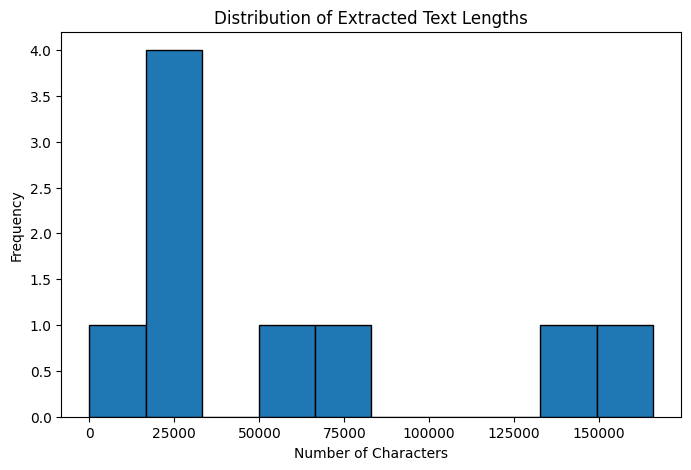

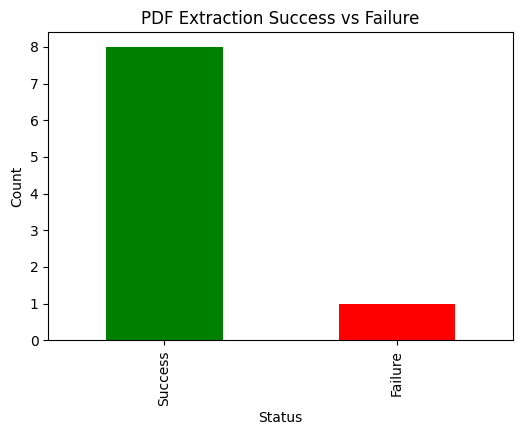


--- Summary of Initial Findings ---
📊 Total PDFs processed: 9
✅ Successful text extractions: 8
❌ Failed / empty extractions: 1
ℹ️ Text length ranges from 13 to 165876 characters

📌 Top 10 Most Frequent Words in Successful PDFs:
were: 558
study: 517
education: 466
treatment: 314
not: 291
their: 290
school: 277
patients: 271
which: 250
zambia: 244


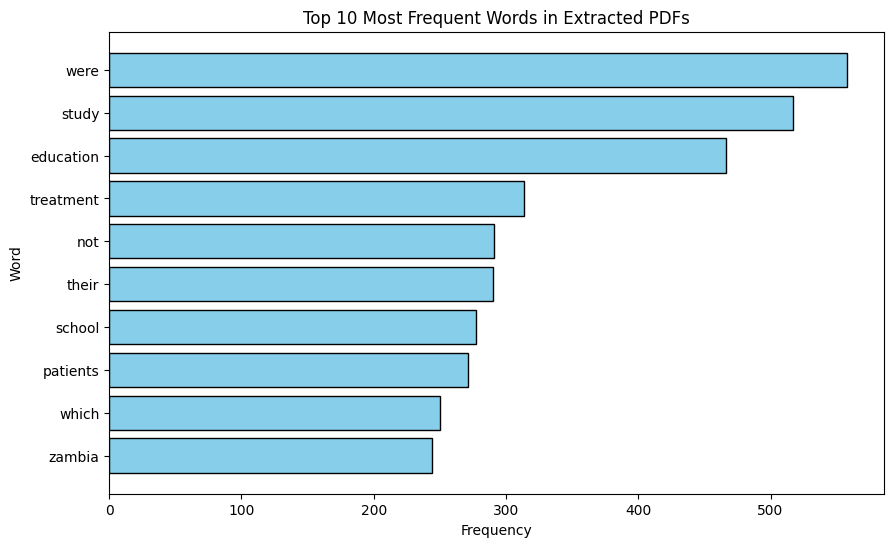

In [ ]:
# =======================
# Load dataset into Pandas DataFrame
# =======================
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re
from IPython.display import display

# Path to the CSV in MyDrive folder
csv_path = "/content/drive/MyDrive/misc-unza25-csc4792-project_team30/references.csv"
data = pd.read_csv(csv_path)

print("✅ Dataset loaded successfully!")

# =======================
# Initial Exploration
# =======================
print("\n--- HEAD ---")
display(data.head())

print("\n--- INFO ---")
data.info()

print("\n--- DESCRIBE ---")
display(data.describe(include="all"))

print("\n--- SHAPE ---")
print(data.shape)

# =======================
# Basic Visualizations
# =======================
# Histogram of extracted text lengths
data["Text_Length"] = data["Extracted_Text"].astype(str).apply(len)

plt.figure(figsize=(8,5))
plt.hist(data["Text_Length"], bins=10, edgecolor="black")
plt.title("Distribution of Extracted Text Lengths")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.show()

# Bar chart of PDFs successfully extracted vs failed
data["Status"] = data["Extracted_Text"].apply(
    lambda x: "Success" if x not in ["Failed to download PDF", "No text found", "Error extracting text"] else "Failure"
)

status_counts = data["Status"].value_counts()

plt.figure(figsize=(6,4))
status_counts.plot(kind="bar", color=["green", "red"])
plt.title("PDF Extraction Success vs Failure")
plt.ylabel("Count")
plt.show()

# =======================
# Word-level Analysis
# =======================
all_text = " ".join(data.loc[data["Status"] == "Success", "Extracted_Text"].dropna().astype(str))
cleaned_text = re.sub(r"[^a-zA-Z\s]", "", all_text).lower()
tokens = cleaned_text.split()

# Remove stopwords
stopwords = set([
    "the", "and", "of", "to", "a", "in", "for", "is", "on", "with", "as",
    "by", "this", "an", "that", "are", "at", "from", "it", "be", "or", "was"
])
tokens = [word for word in tokens if word not in stopwords and len(word) > 2]

word_counts = Counter(tokens)
top_words = word_counts.most_common(10)  # Top 10 words

# =======================
# Summary of Findings
# =======================
successful = status_counts.get("Success", 0)
failed = status_counts.get("Failure", 0)

print("\n--- Summary of Initial Findings ---")
print(f"📊 Total PDFs processed: {len(data)}")
print(f"✅ Successful text extractions: {successful}")
print(f"❌ Failed / empty extractions: {failed}")
print(f"ℹ️ Text length ranges from {data['Text_Length'].min()} to {data['Text_Length'].max()} characters")

print("\n📌 Top 10 Most Frequent Words in Successful PDFs:")
for word, freq in top_words:
    print(f"{word}: {freq}")

# Optional: visualize top words
if top_words:
    words, freqs = zip(*top_words)
    plt.figure(figsize=(10,6))
    plt.barh(words[::-1], freqs[::-1], color="skyblue", edgecolor="black")
    plt.title("Top 10 Most Frequent Words in Extracted PDFs")
    plt.xlabel("Frequency")
    plt.ylabel("Word")
    plt.show()